# Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [ ]:
import pandas as pd


# Load the Dataset

In [ ]:
df = pd.read_csv('movies.csv')

# Data Exploration

In [ ]:
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
print("Shape:", df.shape)

Shape: (62423, 3)


In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['movieId', 'title', 'genres']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
df.describe()


,movieId
count,62423.000000
mean,122220.387646
std,63264.744844
min,1.000000
25%,82146.500000
50%,138022.000000
75%,173222.000000
max,209171.000000



# Check for Missing Values and Duplicates

In [ ]:
# Check for missing values in each column
print("🔍 Missing Values:\n", df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\n📌 Number of Duplicate Rows: {duplicate_count}")

🔍 Missing Values:
 movieId    0
title      0
genres     0
dtype: int64

📌 Number of Duplicate Rows: 0


# Visualize a Few Features

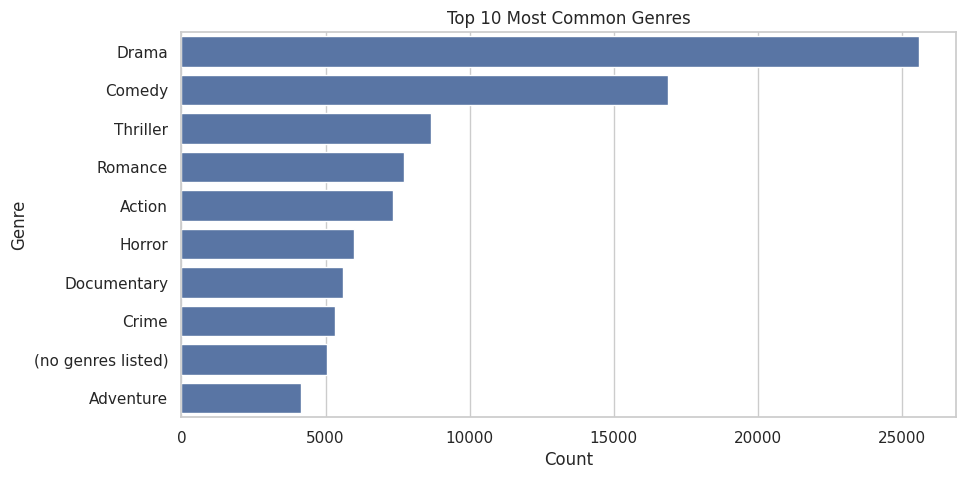

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Most Common Genres (Assumes 'genres' is a pipe-separated string or similar)
if 'genres' in df.columns:
    from collections import Counter
    genre_counts = Counter()
    df['genres'].dropna().apply(lambda x: genre_counts.update(x.split('|') if '|' in x else x.split(',')))

    genres, counts = zip(*genre_counts.most_common(10))
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(counts), y=list(genres))
    plt.title("Top 10 Most Common Genres")
    plt.xlabel("Count")
    plt.ylabel("Genre")
    plt.show()

# 2. Movie Release Years (if 'release_date' column exists)
if 'release_date' in df.columns:
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
    plt.figure(figsize=(12, 6))
    sns.histplot(df['release_year'].dropna(), bins=30, kde=False)
    plt.title("Number of Movies Released per Year")
    plt.xlabel("Release Year")
    plt.ylabel("Count")
    plt.show()

# 3. Distribution of Movie Ratings (if 'vote_average' or similar exists)
if 'vote_average' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['vote_average'], bins=20, kde=True)
    plt.title("Distribution of Movie Ratings")
    plt.xlabel("Average Rating")
    plt.ylabel("Frequency")
    plt.show()

# 4. Distribution of Popularity (if 'popularity' column exists)
if 'popularity' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['popularity'], bins=30, kde=True)
    plt.title("Distribution of Movie Popularity")
    plt.xlabel("Popularity Score")
    plt.ylabel("Frequency")
    plt.show()

# Identify Target and Features

In [ ]:
# Display the column names
print("🔎 Columns in Dataset:")
print(df.columns.tolist())

🔎 Columns in Dataset:
['movieId', 'title', 'genres']


In [ ]:
# Define content features to use (adjust based on your dataset)
features = ['genres', 'keywords', 'cast', 'director']

# Check if all selected features exist
available_features = [f for f in features if f in df.columns]
print("\n✅ Selected Features for Content-Based Filtering:")
print(available_features)


✅ Selected Features for Content-Based Filtering:
['genres']


# Convert Categorical Columns to Numerical


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
df = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Green'],
    'Size': ['S', 'M', 'L', 'S', 'M']
})

# Convert all categorical columns to numerical using LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

print(df)

   Color  Size
0      2     2
1      0     1
2      1     0
3      2     2
4      1     1


# One-Hot Encoding

In [ ]:
# prompt:  One-Hot Encoding

# Sample DataFrame (using the same df as the previous section for continuity)
# df = pd.DataFrame({
#     'Color': ['Red', 'Blue', 'Green', 'Red', 'Green'],
#     'Size': ['S', 'M', 'L', 'S', 'M']
# })

# One-Hot Encode the categorical columns
df_one_hot = pd.get_dummies(df, columns=['Color', 'Size'])

df_one_hot

,Color_0,Color_1,Color_2,Size_0,Size_1,Size_2
0,False,False,True,False,False,True
1,True,False,False,False,True,False
2,False,True,False,True,False,False
3,False,False,True,False,False,True
4,False,True,False,False,True,False


# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample DataFrame (using the one-hot encoded df for demonstration)
# Assuming df_one_hot is the result of the previous step
# If you want to scale numerical features directly from the original df,
# select those columns first.

# Example: Scaling the one-hot encoded features
# scaler = StandardScaler()
scaler = MinMaxScaler() # You can choose StandardScaler or MinMaxScaler

# Select numerical columns to scale.
# In the one-hot encoded df_one_hot, all columns are numerical after encoding.
# If you had other numerical features in your original df (like 'vote_average', 'popularity', 'runtime'),
# you would select those here.
columns_to_scale = df_one_hot.columns # Scaling all columns in the one-hot encoded df

df_scaled = df_one_hot.copy() # Create a copy to avoid modifying the original df_one_hot

df_scaled[columns_to_scale] = scaler.fit_transform(df_one_hot[columns_to_scale])

print("\n📊 Scaled DataFrame:")
print(df_scaled.head())


📊 Scaled DataFrame:
   Color_0  Color_1  Color_2  Size_0  Size_1  Size_2
0      0.0      0.0      1.0     0.0     0.0     1.0
1      1.0      0.0      0.0     0.0     1.0     0.0
2      0.0      1.0      0.0     1.0     0.0     0.0
3      0.0      0.0      1.0     0.0     0.0     1.0
4      0.0      1.0      0.0     0.0     1.0     0.0


# Train-Test Split

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Sample data
data = pd.DataFrame({
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [5, 4, 3, 2, 1],
    'Target': [0, 1, 0, 1, 0]
})

# Features and target
X = data[['Feature1', 'Feature2']]
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train Features:\n", X_train)
print("Test Features:\n", X_test)
print("Train Labels:\n", y_train)
print("Test Labels:\n", y_test)

Train Features:
    Feature1  Feature2
4        50         1
2        30         3
0        10         5
3        40         2
Test Features:
    Feature1  Feature2
1        20         4
Train Labels:
 4    0
2    0
0    0
3    1
Name: Target, dtype: int64
Test Labels:
 1    1
Name: Target, dtype: int64


# Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Load sample dataset
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Green'],
    'Size': ['S', 'M', 'L', 'S', 'M'],
    'Target': [1, 0, 1, 0, 1]
})

# 2. Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 3. Split features and target
X = data.drop('Target', axis=1)
y = data['Target']

# 4. Split train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build and train model
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()


In [ ]:
from sklearn.svm import SVC
model = SVC()

# Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.0000


# Make Predictions from New Input

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Sample training data
data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Green'],
    'Size': ['S', 'M', 'L', 'S', 'M'],
    'Target': [1, 0, 1, 0, 1]
})

# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Split into features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# ✅ New input for prediction (as raw categorical values)
new_input = pd.DataFrame({
    'Color': ['Red'],
    'Size': ['M']
})

# Encode the new input using the same label encoders
for col in new_input.columns:
    le = label_encoders[col]
    new_input[col] = le.transform(new_input[col])

# Predict
prediction = model.predict(new_input)

print("Prediction:", prediction[0])

Prediction: 1


# Convert to DataFrame and Encode

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# --- Assume this was your training data ---
training_data = pd.DataFrame({
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Green'],
    'Size': ['S', 'M', 'L', 'S', 'M'],
    'Target': [1, 0, 1, 0, 1]
})

# Encode categorical columns
label_encoders = {}
for col in training_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    training_data[col] = le.fit_transform(training_data[col])
    label_encoders[col] = le

# --- Now you have new input in raw form ---
new_data = {
    'Color': ['Green'],  # raw input
    'Size': ['L']
}

# Convert to DataFrame
new_df = pd.DataFrame(new_data)

# Encode new data using the same label encoders
for col in new_df.columns:
    if col in label_encoders:
        le = label_encoders[col]
        new_df[col] = le.transform(new_df[col])

print("Encoded new input:")
print(new_df)

Encoded new input:
   Color  Size
0      1     0


# Predict the Final Grade

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample data (replace with your real dataset)
data = pd.DataFrame({
    'Homework': [90, 80, 70, 60, 50],
    'Quiz': [88, 76, 70, 65, 50],
    'Attendance': [95, 85, 80, 70, 60],
    'FinalGrade': [92, 82, 74, 68, 55]
})

# Features and target
X = data[['Homework', 'Quiz', 'Attendance']]
y = data['FinalGrade']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# --- 🔮 New input for prediction ---
new_input = pd.DataFrame({
    'Homework': [85],
    'Quiz': [80],
    'Attendance': [90]
})

# Predict the final grade
predicted_grade = model.predict(new_input)

print("Predicted Final Grade:", predicted_grade[0])

Predicted Final Grade: 85.15


# Deployment-Building an Interactive App

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Sample data
data = pd.DataFrame({
    'Homework': [90, 80, 70, 60, 50],
    'Quiz': [88, 76, 70, 65, 50],
    'Attendance': [95, 85, 80, 70, 60],
    'FinalGrade': [92, 82, 74, 68, 55]
})

# Train model
X = data[['Homework', 'Quiz', 'Attendance']]
y = data['FinalGrade']
model = LinearRegression().fit(X, y)

# Preprocessing and Prediction
def preprocess_and_predict(homework, quiz, attendance):
    scaler = StandardScaler().fit(X)  # Fit scaler on the training data
    new_input = pd.DataFrame([[homework, quiz, attendance]], columns=['Homework', 'Quiz', 'Attendance'])
    new_input_scaled = scaler.transform(new_input)  # Transform the new input
    return model.predict(new_input_scaled)[0]

# Gradio interface
inputs = [
    gr.Slider(0, 100, 85, label="Homework"),
    gr.Slider(0, 100, 80, label="Quiz"),
    gr.Slider(0, 100, 90, label="Attendance")
]

outputs = gr.Textbox(label="Predicted Final Grade")

# Launch Gradio app
gr.Interface(fn=preprocess_and_predict, inputs=inputs, outputs=outputs, live=True).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d5e6edf2e4a8f9652e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
